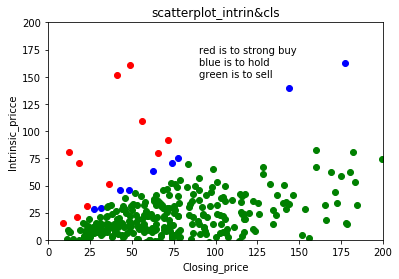

In [13]:
# -*- coding:utf-8 -*-
#Python 3.6.3
from WindPy import *
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
ret=pd.read_excel('d:/RIV/equity_return.xlsx')
re=ret.T
result_2016=pd.read_excel('d:/RIV/SP500_noa_2016.xlsx')
result_2015=pd.read_excel('d:/RIV/SP500_noa_2015.xlsx')
result_2014=pd.read_excel('d:/RIV/SP500_noa_2014.xlsx')
result_2013=pd.read_excel('d:/RIV/SP500_noa_2013.xlsx')
close_price=pd.read_excel('d:/RIV/Intrinsic_value&Closing_Price_of_20161230.xlsx')
##cost of operation
bs_re=pd.concat([result_2016,re],axis=1)#concat re and NOA
rd=0.05 #this is totally untrustworhty, need to be revised
bs_re['r']=(bs_re['equity_return']*bs_re['WGSD_STKHLDRS_EQ']+(bs_re['WGSD_LIABS']-bs_re['WGSD_CCE'])*rd)/(bs_re['WGSD_STKHLDRS_EQ']+bs_re['WGSD_LIABS']-bs_re['WGSD_CCE'])
# r is the cost of operation
bs_re.to_excel('d:/RIV/cost_of_operation.xlsx')
result_2016['WGSD_OPERATING_INCOME']=result_2016['WGSD_INC_PRETAX']-result_2016['WGSD_OPERATING_TAX']
result_2016['WGSD_TAX_RATE']=result_2016['WGSD_OPERATING_TAX']/result_2016['WGSD_INC_PRETAX']
result_2016['WGSD_RNOA']=2*result_2016['WGSD_OPERATING_INCOME']/(result_2016['WGSD_NOA_ALPHA']+result_2015['WGSD_NOA_ALPHA'])
result_2016['WGSD_REOI']=(result_2016['WGSD_RNOA']-bs_re['r'])*result_2015['WGSD_NOA_ALPHA']
diff_2014=(result_2014-result_2013)/result_2013
diff_2015=(result_2015-result_2014)/result_2014
diff_2016=(result_2016-result_2015)/result_2015
AVERAGE3=(result_2014+result_2016+result_2015)/3
AVERAGE3['COST_OF_OPERATIONS']=bs_re['r']
AVERAGE3['WGSD_SALES_INCREASE_RATE']=(diff_2014['WGSD_SALES']+diff_2015['WGSD_SALES']+diff_2016['WGSD_SALES'])/3
result_2017=pd.DataFrame({})
result_2017['WGSD_SALES']=result_2016['WGSD_SALES']*(AVERAGE3['WGSD_SALES_INCREASE_RATE']+1)
result_2017['WGSD_OPER_COST']=result_2016['WGSD_SALES']*(1-AVERAGE3['WGSD_GROSS_MARGIN'])
result_2017['WGSD_GROSS_MARGIN_AMOUNT']=result_2017['WGSD_SALES']-result_2017['WGSD_OPER_COST']
result_2017['WGSD_OPER_EXP']=result_2016['WGSD_SALES']*(AVERAGE3['WGSD_SGA_EXPENSE_RATIO'])
result_2017['WGSD_CORE_OPERATING_INCOME_BEFORE_TAX']=result_2017['WGSD_GROSS_MARGIN_AMOUNT']-result_2017['WGSD_OPER_EXP']
result_2017['WGSD_OPERATING_INCOME']=result_2017['WGSD_CORE_OPERATING_INCOME_BEFORE_TAX']*result_2016['WGSD_TAX_RATE']
result_2017['WGSD_RECEIV_NET']=result_2017['WGSD_SALES']/AVERAGE3['WGSD_RECEIVABLES_TURNOVER']
result_2017['WGSD_INVENTORIES']=result_2017['WGSD_OPER_COST']/AVERAGE3['WGSD_INVENTORY_TURNOVER']
result_2017['WGSD_PPE_NET']=result_2017['WGSD_SALES']/AVERAGE3['WGSD_PPE_TURNOVER']
result_2017['WGSD_OTHER_NOA']=AVERAGE3['WGSD_OTHER_NOA2SALES']*result_2017['WGSD_SALES']
result_2017['WGSD_NOA_ALPHA']=result_2017['WGSD_RECEIV_NET']+result_2017['WGSD_INVENTORIES']+result_2017['WGSD_PPE_NET']+result_2017['WGSD_OTHER_NOA']
result_2017['WGSD_RNOA']=2*result_2017['WGSD_OPERATING_INCOME']/(result_2016['WGSD_NOA_ALPHA']+result_2017['WGSD_NOA_ALPHA'])
result_2017['WGSD_REOI']=(result_2017['WGSD_RNOA']-AVERAGE3['COST_OF_OPERATIONS'])*result_2016['WGSD_NOA_ALPHA']
result_2017['WGSD_GROWTH_ON_REOI']=(result_2017['WGSD_REOI']-result_2016['WGSD_REOI'])/result_2016['WGSD_REOI']
result_2017.to_excel('d:/RIV/predicted_2017.xlsx')

result_2018=pd.DataFrame({})
result_2018['WGSD_SALES']=result_2017['WGSD_SALES']*(AVERAGE3['WGSD_SALES_INCREASE_RATE']+1)
result_2018['WGSD_OPER_COST']=result_2017['WGSD_SALES']*(1-AVERAGE3['WGSD_GROSS_MARGIN'])
result_2018['WGSD_GROSS_MARGIN_AMOUNT']=result_2018['WGSD_SALES']-result_2018['WGSD_OPER_COST']
result_2018['WGSD_OPER_EXP']=result_2017['WGSD_SALES']*(AVERAGE3['WGSD_SGA_EXPENSE_RATIO'])
result_2018['WGSD_CORE_OPERATING_INCOME_BEFORE_TAX']=result_2018['WGSD_GROSS_MARGIN_AMOUNT']-result_2018['WGSD_OPER_EXP']
result_2018['WGSD_OPERATING_INCOME']=result_2018['WGSD_CORE_OPERATING_INCOME_BEFORE_TAX']*result_2016['WGSD_TAX_RATE']
result_2018['WGSD_RECEIV_NET']=result_2018['WGSD_SALES']/AVERAGE3['WGSD_RECEIVABLES_TURNOVER']
result_2018['WGSD_INVENTORIES']=result_2018['WGSD_OPER_COST']/AVERAGE3['WGSD_INVENTORY_TURNOVER']
result_2018['WGSD_PPE_NET']=result_2018['WGSD_SALES']/AVERAGE3['WGSD_PPE_TURNOVER']
result_2018['WGSD_OTHER_NOA']=AVERAGE3['WGSD_OTHER_NOA2SALES']*result_2018['WGSD_SALES']
result_2018['WGSD_NOA_ALPHA']=result_2018['WGSD_RECEIV_NET']+result_2018['WGSD_INVENTORIES']+result_2018['WGSD_PPE_NET']+result_2018['WGSD_OTHER_NOA']
result_2018['WGSD_RNOA']=2*result_2018['WGSD_OPERATING_INCOME']/(result_2017['WGSD_NOA_ALPHA']+result_2018['WGSD_NOA_ALPHA'])
result_2018['WGSD_REOI']=(result_2018['WGSD_RNOA']-AVERAGE3['COST_OF_OPERATIONS'])*result_2017['WGSD_NOA_ALPHA']
result_2018['WGSD_GROWTH_ON_REOI']=(result_2018['WGSD_REOI']-result_2017['WGSD_REOI'])/result_2017['WGSD_REOI']
result_2018.to_excel('d:/RIV/predicted_2018.xlsx')

result_2019=pd.DataFrame({})
result_2019['WGSD_SALES']=result_2018['WGSD_SALES']*(AVERAGE3['WGSD_SALES_INCREASE_RATE']+1)
result_2019['WGSD_OPER_COST']=result_2018['WGSD_SALES']*(1-AVERAGE3['WGSD_GROSS_MARGIN'])
result_2019['WGSD_GROSS_MARGIN_AMOUNT']=result_2019['WGSD_SALES']-result_2019['WGSD_OPER_COST']
result_2019['WGSD_OPER_EXP']=result_2018['WGSD_SALES']*(AVERAGE3['WGSD_SGA_EXPENSE_RATIO'])
result_2019['WGSD_CORE_OPERATING_INCOME_BEFORE_TAX']=result_2019['WGSD_GROSS_MARGIN_AMOUNT']-result_2019['WGSD_OPER_EXP']
result_2019['WGSD_OPERATING_INCOME']=result_2019['WGSD_CORE_OPERATING_INCOME_BEFORE_TAX']*result_2016['WGSD_TAX_RATE']
result_2019['WGSD_RECEIV_NET']=result_2019['WGSD_SALES']/AVERAGE3['WGSD_RECEIVABLES_TURNOVER']
result_2019['WGSD_INVENTORIES']=result_2019['WGSD_OPER_COST']/AVERAGE3['WGSD_INVENTORY_TURNOVER']
result_2019['WGSD_PPE_NET']=result_2019['WGSD_SALES']/AVERAGE3['WGSD_PPE_TURNOVER']
result_2019['WGSD_OTHER_NOA']=AVERAGE3['WGSD_OTHER_NOA2SALES']*result_2019['WGSD_SALES']
result_2019['WGSD_NOA_ALPHA']=result_2019['WGSD_RECEIV_NET']+result_2019['WGSD_INVENTORIES']+result_2019['WGSD_PPE_NET']+result_2019['WGSD_OTHER_NOA']
result_2019['WGSD_RNOA']=2*result_2019['WGSD_OPERATING_INCOME']/(result_2018['WGSD_NOA_ALPHA']+result_2019['WGSD_NOA_ALPHA'])
result_2019['WGSD_REOI']=(result_2019['WGSD_RNOA']-AVERAGE3['COST_OF_OPERATIONS'])*result_2018['WGSD_NOA_ALPHA']
result_2019['WGSD_GROWTH_ON_REOI']=(result_2019['WGSD_REOI']-result_2018['WGSD_REOI'])/result_2018['WGSD_REOI']
result_2019.to_excel('d:/RIV/predicted_2019.xlsx')

residual_value_model=pd.DataFrame({})
residual_value_model['TERMINAL_GROWTH1']=(result_2017['WGSD_GROWTH_ON_REOI']+result_2018['WGSD_GROWTH_ON_REOI']+result_2019['WGSD_GROWTH_ON_REOI'])/3 # this should pay much more attention, since it is re;ated to macroeconomy & industries here the 2.5% increase of GDP is used
residual_value_model['TERMINAL_GROWTH']=residual_value_model['TERMINAL_GROWTH1']+0.01
residual_value_model['WGSD_NEXT_REOI']=result_2019['WGSD_REOI']*(1+residual_value_model['TERMINAL_GROWTH'])
residual_value_model['WGSD_CONTINUE_VALUE']=residual_value_model['WGSD_NEXT_REOI']/(residual_value_model['TERMINAL_GROWTH']-AVERAGE3['COST_OF_OPERATIONS'])
residual_value_model['WGSD_CONTINUE_VALUE_PV']=residual_value_model['WGSD_CONTINUE_VALUE']/((1+residual_value_model['TERMINAL_GROWTH'])**3)
residual_value_model['TOTAL_PV_OF_REOI_TO_2016']=result_2019['WGSD_REOI']/((1+AVERAGE3['COST_OF_OPERATIONS'])**3)\
+result_2018['WGSD_REOI']/((1+residual_value_model['TERMINAL_GROWTH'])**2)\
+result_2017['WGSD_REOI']/((1+residual_value_model['TERMINAL_GROWTH']))
residual_value_model['NOA_AS_OF_2016']=result_2016['WGSD_NOA_ALPHA']
residual_value_model['VALUE_OF_OPERATIONS']=residual_value_model['WGSD_CONTINUE_VALUE_PV']\
+residual_value_model['TOTAL_PV_OF_REOI_TO_2016']\
+residual_value_model['NOA_AS_OF_2016']
residual_value_model['NFA']=result_2016['WGSD_NFA_ALPHA']
residual_value_model['VALUE_OF_COMMON_EQUITY']=residual_value_model['NFA']+residual_value_model['VALUE_OF_OPERATIONS']
residual_value_model['TOTAL_SHARES']=result_2016['TOTAL_SHARES']
residual_value_model['INTRINSIC_SHARE_PRICE']=residual_value_model['VALUE_OF_COMMON_EQUITY']/residual_value_model['TOTAL_SHARES']
residual_value_model.to_excel('d:/RIV/RV_MODEL.xlsx')

OUTPUT=pd.DataFrame({})
OUTPUT['INTRINSIC_SHARE_PRICE']=residual_value_model['INTRINSIC_SHARE_PRICE']
OUTPUT['CLOSE_PRICE']=close_price['CLOSE_PRICE']
i=0
worthbuy=({})
while i<len(OUTPUT['CLOSE_PRICE']):
    if (OUTPUT['INTRINSIC_SHARE_PRICE'][i]-OUTPUT['CLOSE_PRICE'][i])/OUTPUT['CLOSE_PRICE'][i]>0.1:
        plt.scatter(OUTPUT['CLOSE_PRICE'][i],OUTPUT['INTRINSIC_SHARE_PRICE'][i],color='red')
        i=i+1
        
    elif (OUTPUT['INTRINSIC_SHARE_PRICE'][i]-OUTPUT['CLOSE_PRICE'][i])/OUTPUT['CLOSE_PRICE'][i]>-0.1:
        plt.scatter(OUTPUT['CLOSE_PRICE'][i],OUTPUT['INTRINSIC_SHARE_PRICE'][i],color='blue')
        i=i+1
    else:
        plt.scatter(OUTPUT['CLOSE_PRICE'][i],OUTPUT['INTRINSIC_SHARE_PRICE'][i],color='green')
        i=i+1
plt.xlabel('Closing_price')
plt.ylabel('Intrinsic_price')
plt.title('scatterplot_intrin&cls')
plt.axis([0, 200, 0, 200])
plt.text(90, 150, 'red is to strong buy\nblue is to hold\ngreen is to sell')
OUTPUT.to_excel('d:/RIV/Intrinsic_value&Closing_Price_of_20161230_new.xlsx')
plt.show()

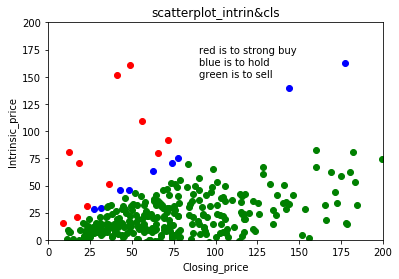

In [17]:
##matplotlib 

i=0
worthbuy=({})
while i<len(OUTPUT['CLOSE_PRICE']):
    if (OUTPUT['INTRINSIC_SHARE_PRICE'][i]-OUTPUT['CLOSE_PRICE'][i])/OUTPUT['CLOSE_PRICE'][i]>0.1:
        plt.scatter(OUTPUT['CLOSE_PRICE'][i],OUTPUT['INTRINSIC_SHARE_PRICE'][i],color='red')
        i=i+1
        
    elif (OUTPUT['INTRINSIC_SHARE_PRICE'][i]-OUTPUT['CLOSE_PRICE'][i])/OUTPUT['CLOSE_PRICE'][i]>-0.1:
        plt.scatter(OUTPUT['CLOSE_PRICE'][i],OUTPUT['INTRINSIC_SHARE_PRICE'][i],color='blue')
        i=i+1
    else:
        plt.scatter(OUTPUT['CLOSE_PRICE'][i],OUTPUT['INTRINSIC_SHARE_PRICE'][i],color='green')
        i=i+1
plt.xlabel('Closing_price')
plt.ylabel('Intrinsic_price')
plt.title('scatterplot_intrin&cls')
plt.axis([0, 200, 0, 200])
plt.text(90, 150, 'red is to strong buy\nblue is to hold\ngreen is to sell')
plt.show()

In [22]:
handle_close('sasa')

Closed Figure!


In [24]:
OUTPUT[OUTPUT['INTRINSIC_SHARE_PRICE']>OUTPUT['CLOSE_PRICE']] #Pandas Slicing

,INTRINSIC_SHARE_PRICE,CLOSE_PRICE
AGN.N,318.359527,210.01
CERN.O,296.434790,47.37
CTSH.O,109.327393,56.03
DHI.N,28.310704,27.33
FLIR.O,51.644413,36.19
GILD.O,91.859966,71.61
HES.N,63.284101,62.29
JCI.N,151.772740,41.19
LB.N,80.366184,65.84
LEN.N,46.190912,42.93
